#### Navid Al-Musabbir 1721853042
#### Md. Rubel Rana 1712661642

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae

### Dataset Import

In [2]:
data = 'dataset/Wheat/wheat.csv'

In [3]:
df = pd.read_csv(data)

In [4]:
df.head()

,District,Area,Year,Max_Temp,Min_Temp,Rainfall,Humidity,Wind,Cloud,Sunshine,ALT,Productions,PPH
0,2,5645,1969,30.750,14.100,8.0,70.50,0.600,1.575,9.200,20,3085,0.546501329
1,3,75,1969,29.925,15.775,13.5,73.75,1.025,2.375,8.875,6,30,0.4
2,4,15590,1969,31.400,16.950,14.0,76.25,0.300,0.700,7.400,10,7410,0.475304682
3,5,15570,1969,30.025,14.775,6.5,69.25,0.600,1.875,9.125,9,5240,0.336544637
4,6,6610,1969,28.975,13.250,24.5,73.50,0.200,0.600,6.724,37,2725,0.41225416


In [5]:
df.tail()

,District,Area,Year,Max_Temp,Min_Temp,Rainfall,Humidity,Wind,Cloud,Sunshine,ALT,Productions,PPH
721,13,0,2012,31.325,15.000,19.00,79.75,2.275,1.475,7.275,3,0,#DIV/0!
722,14,73957,2012,29.725,12.775,31.00,79.00,1.850,1.600,6.025,20,97422,1.317278959
723,16,6942,2012,28.975,13.125,3.50,79.00,1.775,1.800,5.425,34,7053,1.015989628
724,17,367,2012,31.625,15.225,13.75,74.50,3.000,2.050,6.900,35,350,0.953678474
725,18,16364,2012,29.850,13.600,27.00,79.50,2.025,1.400,5.700,10,15515,0.94811782


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   District     726 non-null    int64  
 1   Area         726 non-null    int64  
 2   Year         726 non-null    int64  
 3   Max_Temp     726 non-null    float64
 4   Min_Temp     726 non-null    float64
 5   Rainfall     726 non-null    float64
 6   Humidity     726 non-null    float64
 7   Wind         726 non-null    float64
 8   Cloud        726 non-null    float64
 9   Sunshine     726 non-null    float64
 10  ALT          726 non-null    int64  
 11  Productions  726 non-null    int64  
 12  PPH          726 non-null    object 
dtypes: float64(7), int64(5), object(1)
memory usage: 73.9+ KB


In [7]:
df= df[df['Area'] != 0]
df= df[df['Productions'] != 0]
df['PPH'] = pd.to_numeric(df['PPH'])

In [8]:
z=np.abs(stats.zscore(df))

In [9]:
np.where(z > 4)

(array([100, 189, 222, 367, 367, 398, 417, 427, 448, 448, 449, 466, 473,
        473, 491, 491, 509, 509, 526, 526, 542, 542, 641, 646, 656, 661,
        671, 676, 685, 690], dtype=int64),
 array([ 5,  8,  8, 11, 12,  1,  5,  5,  8,  9, 12,  8,  1, 11,  1, 11,  1,
        11,  1, 11,  1, 11,  7,  7,  7,  7,  7,  7,  7,  7], dtype=int64))

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [11]:
(df < (Q1 - 1.5 * IQR)) | (df < (Q3 - 1.5 * IQR))

,District,Area,Year,Max_Temp,Min_Temp,Rainfall,Humidity,Wind,Cloud,Sunshine,ALT,Productions,PPH
0,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,True
4,False,False,True,True,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,False,False,False,False,True,False,False,False,False,True,False,False,False
722,False,False,False,False,True,False,False,False,False,True,False,False,False
723,False,False,False,True,False,False,False,False,False,True,False,False,False
724,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df = df[(z < 4).all(axis=1)]

In [13]:
#defining response and predictor variables
X = df[['District', 'Area', 'Year', 'Max_Temp', 'Min_Temp', 'Rainfall',
       'Humidity', 'Wind', 'Cloud', 'Sunshine', 'ALT']]
y = df[['PPH']]

### Checking number of principal components and MSE

In [14]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

In [15]:
#defining cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

In [16]:
for i in np.arange(1, 12):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)

Text(0.5, 1.0, 'Production')

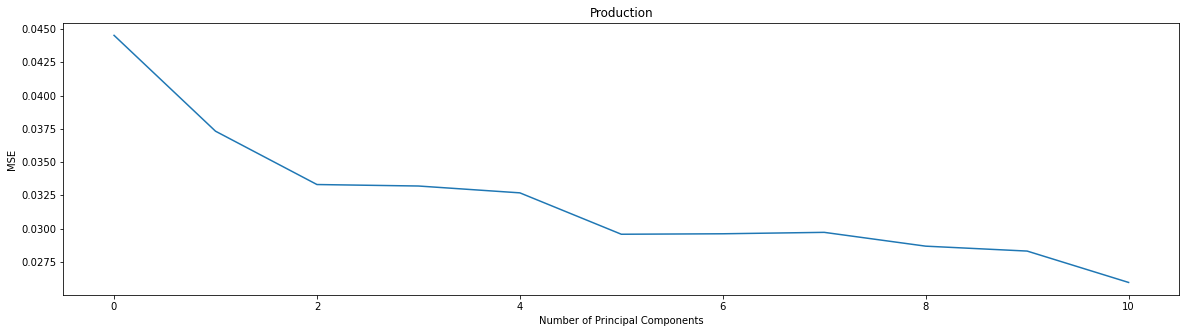

In [17]:
plt.figure(figsize=(20, 5))
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Production')

In [18]:
#spliting the dataset
rng = np.random.RandomState(0)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=rng)

In [19]:
#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

In [20]:
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

LinearRegression()

In [21]:
pred = regr.predict(X_reduced_test)
print("MSE =", np.sqrt(mean_squared_error(y_test, pred)))

MSE = 0.22677198426531636


In [22]:
print("MAE =", mae(y_test, pred))

MAE = 0.1790885186761464


### PCR RMSE, R Squared, MAE Values using 9th component

In [23]:
pcr = make_pipeline(StandardScaler(), PCA(n_components=9), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps['pca']

In [24]:
#calculating RMSE
pcr.fit(scale(X_train), y_train)

print("RMSE =", np.sqrt(mean_squared_error(y_test, pcr.predict(scale(X_test)))))

RMSE = 0.17058608684343066


In [25]:
#calculating R2
pcr.fit(X_train, y_train)

print("R2 =", pcr.score(X_test, y_test))

R2 = 0.45334139573603927


In [26]:
#calculating MAE
pcr.fit(scale(X_train), y_train)

print("MAE =", mae(y_test, pcr.predict(scale(X_test))))

MAE = 0.13004628342570318


### Plot

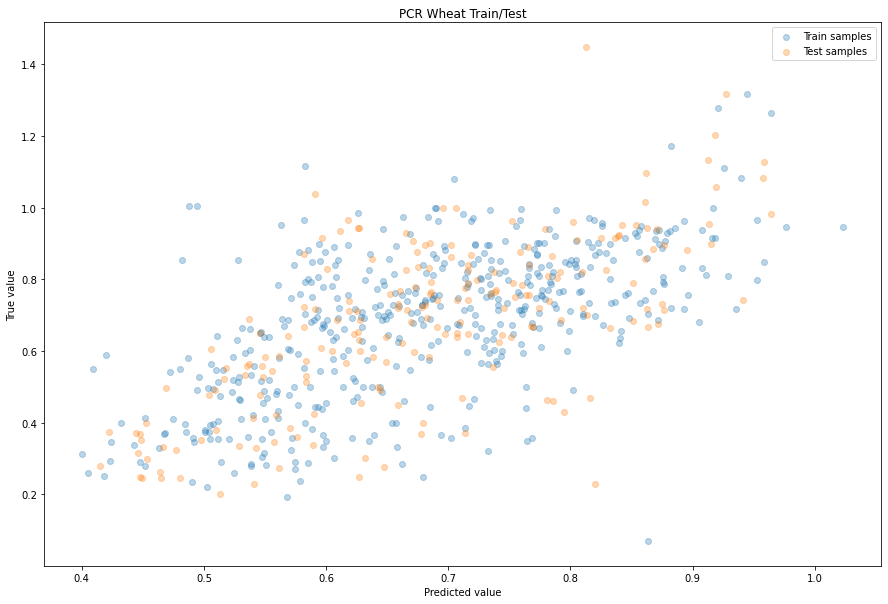

In [27]:
plt.figure(figsize=(15,10))
plt.scatter(pcr.predict(scale(X_train)), y_train, alpha=.3, label="Train samples")
plt.scatter(pcr.predict(scale(X_test)), y_test, alpha=.3, label="Test samples")
plt.title('PCR Wheat Train/Test')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.savefig("figures/pcr_wheat.png")
plt.show()

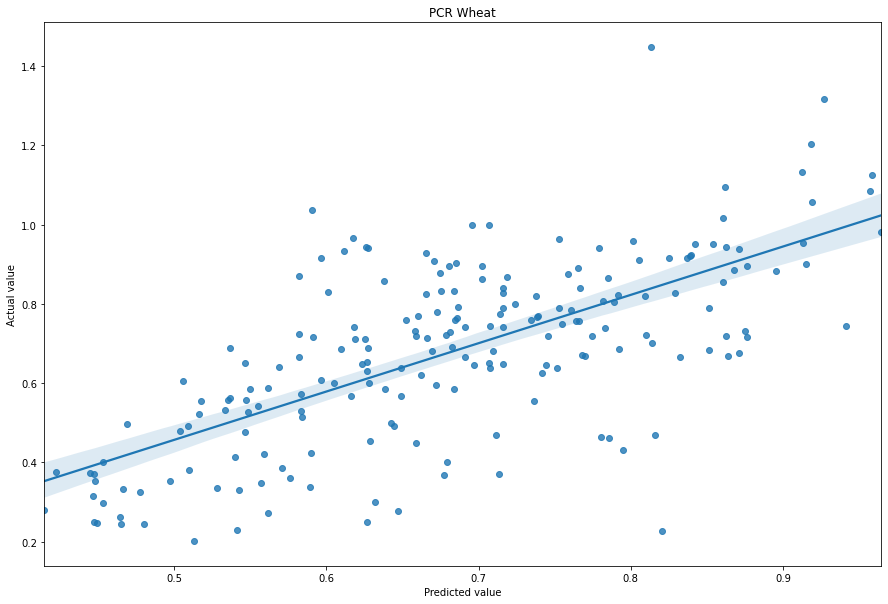

In [28]:
plt.figure(figsize=(15,10))
sns.regplot(x=pcr.predict(scale(X_test)), y = y_test, data = df)
plt.title('PCR Wheat')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.savefig("figures/pcr_wheat_2.png")

### Checking number of principal components and MSE

In [29]:
#defining cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
mse = []
n = len(X)

In [30]:
for i in np.arange(1, 12):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

Text(0.5, 1.0, 'Production')

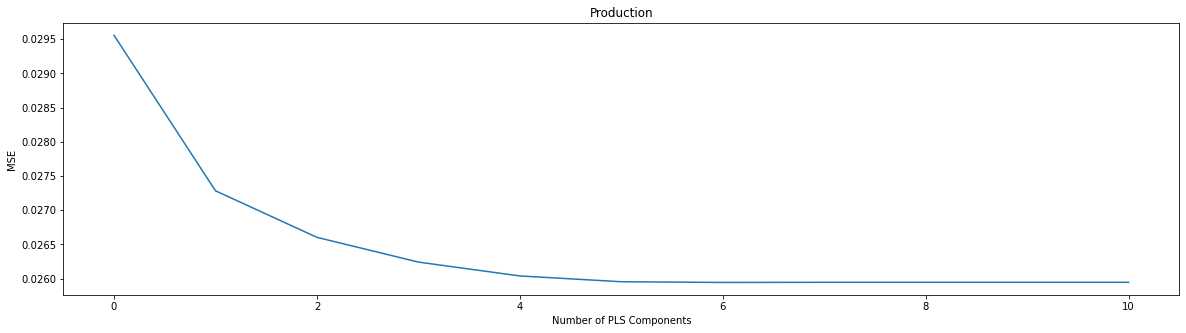

In [31]:
plt.figure(figsize=(20, 5))
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('Production')

### PLSR RMSE, R Squared, MAE Values Using 6th Component

In [32]:
#calculating RMSE
pls = PLSRegression(n_components=6)
pls.fit(scale(X_train), y_train)

print("RMSE =", np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test)))))

RMSE = 0.16074551485745753


In [33]:
#calculating R2
pls = PLSRegression(n_components=6)
pls.fit((X_train), y_train)

print("R2 =", pls.score(X_test, y_test))

R2 = 0.5156839820908451


In [34]:
#calculating MAE
pls = PLSRegression(n_components=6)
pls.fit(scale(X_train), y_train)

print("MAE =", mae(y_test, pls.predict(scale(X_test))))

MAE = 0.12394344749994503


### Plot

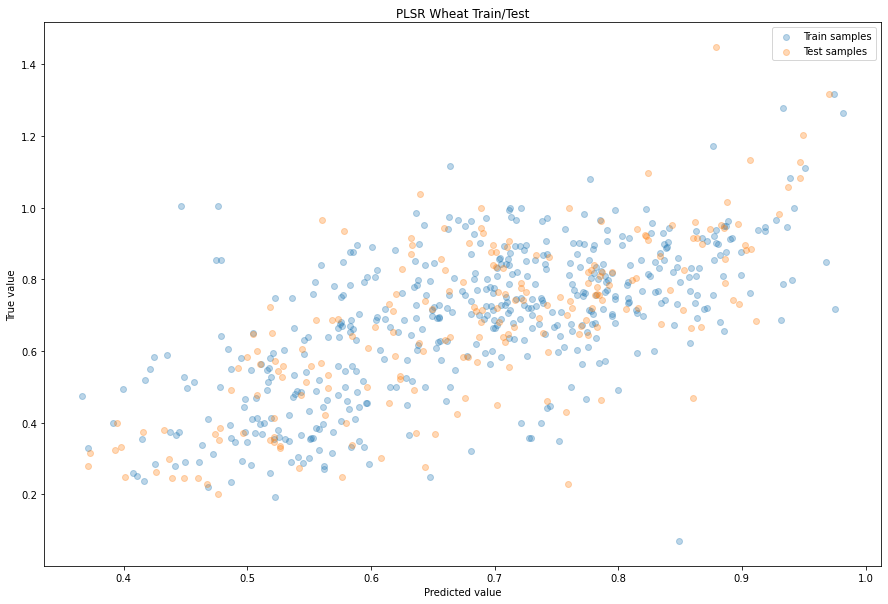

In [35]:
pls = PLSRegression(n_components=6)
pls.fit(X_train, y_train)

plt.figure(figsize=(15,10)) 
plt.scatter(pls.predict(X_train), y_train, alpha=.3, label="Train samples") 
plt.scatter(pls.predict(X_test), y_test, alpha=.3, label="Test samples")  
plt.title('PLSR Wheat Train/Test')
plt.xlabel("Predicted value") 
plt.ylabel("True value") 
plt.legend()
plt.savefig("figures/plsr_wheat.png")
plt.show()

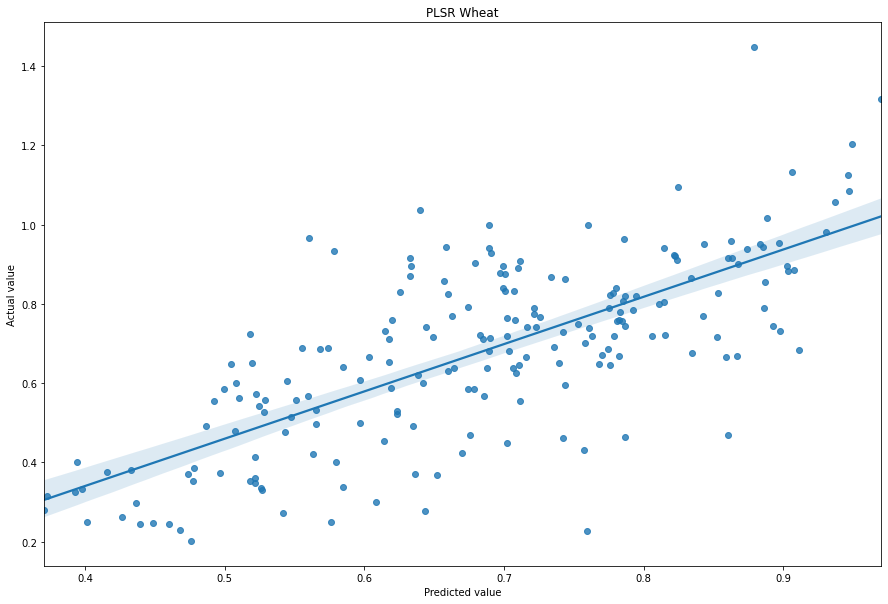

In [36]:
plt.figure(figsize=(15,10))
sns.regplot(x=pls.predict(X_test), y = y_test, data = df)
plt.title('PLSR Wheat')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.savefig("figures/plsr_wheat_2.png")